# Krittika Convener Selection Assignments
## Python Assignment

1. You may find the **KSP tutorials** useful: https://github.com/krittikaiitb/tutorials - Tutorials 1,2,3, and 4 are particularly relevant. These cover basic `python`, `numpy`, functions in `python` and `matplotlib` respectively.

2. A helpful reminder that executing a cell with `help` (for example: `help(np.loadtxt)` or `np.loadtxt?`) will show the documentation for that function.

3. The use of internet is completely ALLOWED for solving this assignment.
4. Feel free to use multiple cells for your solutions. But keep them separate for each question (don't use a cell to solve Q1 after Q2)

### Q1: Parsing Form Responses (10 points)
Suppose you have collected responses from various IITB students using a google form and the responses have been extracted as a csv file. You want to mail all the people who have filled the form now. The email client used by LDAP mail accepts a single string of comma separated email adresses (note that {rollnumber}@iitb.ac.in will redirect to respective student). 

Your task is to parse the CSV file and generate the comma separated string.

For example, if the csv file contains 

| Sr. No | Name | Roll Number |
| -------- | -------- | -------- |
| 1     | Newton     | 2000001    |
| 2     | Galileo     | 2000005    |
| 3     | Kepler     | 2000010    |


Then your program should print the string `2000001@iitb.ac.in, 2000005@iitb.ac.in, 2000010@iitb.ac.in`

In [24]:
file1 = "Dataset_Q1.csv"

You may find `numpy.loadtxt` or `numpy.genfromtxt` to be useful here. Feel free to use any method you wish to load the data from `file1`.

Write your code as a function that takes in the data file as input and returns the relevant string.

In [23]:
# Solution Code
import numpy as np
def get_emails(file):
    #load roll no. and convert into integer
    data = np.loadtxt(file, delimiter=',',usecols =2).astype(int)
    #create an array of length data filled with @iitb.ac.in
    subs = np.full(len(data),'@iitb.ac.in')
    #convert data into string to add them
    data_2 = data.astype(str)
    #return the result with bracket of list and '' of string removed
    return str(list(np.char.add(data_2,subs))).replace("'", "")[1:-1]



    
    

In [19]:
print(get_emails(file1))

20000003@iitb.ac.in, 20000006@iitb.ac.in, 20010000@iitb.ac.in, 19020000@iitb.ac.in, 20000304@iitb.ac.in


### Q2: The moons of Endor (20 points)

Endor is a fictional planet from the [Star Wars](https://starwars.fandom.com/wiki/Endor_(planet)) universe which has 9 major moons. The masses, semimajor axes and time periods of each of these moons is given in `Dataset_Q2.csv`. The masses (*m*) are given as a fraction of the mass of Endor itself, the semimajor axis (*a*) as a fraction of the radius of Endor and time period (*T*) in Endor days.

<b style='color:red;'>Note for Star Wars fans</b>: First, are you ok? Second, the values are fabricated, don't go looking for reasons why the data can't hold up to random in-universe information.

In [4]:
file2 = 'Dataset_Q2.csv'

Recall the usual Kepler's third law which can be written as 
$$\frac{a^{3/2}}{T} = \sqrt{\frac{G(M_{planet}+m_{moon})}{4\pi^2}}$$
where $a$ is the semimajor axis, $T$ is the time period, $M_{planet}$ is the mass of the planet, $m_{moon}$ is the mass of the moon, and $G$ is the universal gravitational constant.


We plan to fit the data we have to the power law relation 
$$\frac{a^{x}}{T} = \sqrt{\frac{G(M_{planet}+m_{moon})}{4\pi^2}}$$

Your task is to determine the constant $x$ by fitting the given 'experimental' data and decide whether Kepler's law (with $x$ = 1.5) holds, in the galaxy far far away (where star wars happens). Also find the value of $G$ in the given unit system.


Hint: `numpy.polyfit` or `scipy.optimize.curve_fit` (and maybe `numpy.log`) might be useful for solving this question.

In [11]:
# Code here
#...
import numpy as np
from scipy.optimize import curve_fit
#load the data
mass = np.loadtxt(file2, delimiter=',',usecols = 0)
time = np.loadtxt(file2, delimiter=',',usecols = 1)
sm_axis = np.loadtxt(file2, delimiter=',',usecols = 2)
#decide x and y values from the power eqn by taking log on both sides
y_values = np.log(time) + np.log(1+mass)/2 
x_values = np.log(sm_axis) 
#form a linear equation
def objective(x,m,c):
    return m*x - c
popt,_ = curve_fit(objective, x_values, y_values)
x = popt[0]
#mass of endor:1.76 x 10²³ kilogram
#radius of endor:4900km
#time period:402 Standard days
#orbital period:18hrs
#source:https://starwars.fandom.com/wiki/Endor
M = 1.76*10**23
R = 4900*10**3
G = 2*np.exp(popt[1]-np.log(M)/2 + np.log(2*np.pi) + x*np.log(R)-np.log(18*60*60))
print('G ={}'.format(G))#sounds unrealistic just like the planet



G =11126.982610660601


In [6]:
print('x={}'.format(x))


x=2.459830979098901


## Q2 Bonus (10 points): 
Make a plot of the power law curve you have found, and the scatter plot the data points on top of this curve, to establish that your fit is good.

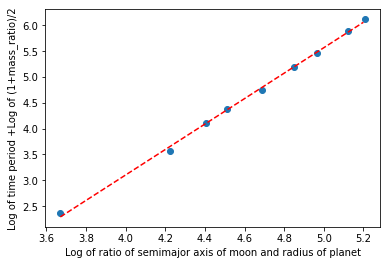

In [14]:
# Code here
from numpy import arange
from matplotlib import pyplot
#scatter values
pyplot.scatter(x_values, y_values)
#decide the range for x
x_line = arange(min(x_values), max(x_values),0.01)
# calculate the output for the range
y_line = objective(x_line, popt[0], popt[1])
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.xlabel('Log of ratio of semimajor axis of moon and radius of planet')
pyplot.ylabel('Log of time period +Log of (1+mass_ratio)/2')
pyplot.show()
